# Team 3


## Doctor-Patient Conversations Analysis using NLP  --- By Gayatri Gide

Importing Packages

In [ ]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import spacy
import matplotlib.pyplot as plt
import seaborn as sns
# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
# Load SpaCy model
nlp = spacy.load("en_core_web_sm")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


Connecting Dataset

In [ ]:
# File path to dataset
file_path ='/content/drive/MyDrive/Colab Notebooks/gpt-4.csv'
# Load dataset, skipping bad lines and limiting rows for faster processing
df = pd.read_csv(file_path, on_bad_lines='skip', nrows=3000)
print("Dataset Loaded:")
print(df.head())


Dataset Loaded:
                                                data  \
0  This 60-year-old male was hospitalized due to ...   
1  A 39-year-old man was hospitalized due to an i...   
2  One week after a positive COVID-19 result this...   
3  This 69-year-old male was admitted to the ICU ...   
4  This 57-year-old male was admitted to the ICU ...   

                                        conversation  
0  Doctor: Good morning, how are you feeling toda...  
1  Doctor: Hello, how are you feeling today?\nPat...  
2  Doctor: Hello, how are you feeling today?\nPat...  
3  Doctor: Hello, how are you feeling today?\nPat...  
4  Doctor: Good morning, how are you feeling toda...  


Taking sample of 1000 rows

In [ ]:
sample_df = df.sample(n=1000, random_state=42)
sample_df

,data,conversation
1801,The third case was a 64-year-old female who ad...,"Doctor: Good afternoon, how are you feeling to..."
1190,A 34-year-old woman presented with severe epis...,"Doctor: Good morning, how can I help you today..."
1817,"A 53-year-old man, who had non-exertional ches...","Doctor: Hello, Mr. Johnson. How are you feelin..."
251,"A 34 year old woman from the east of Morocco, ...","Doctor: Good afternoon, Mrs. X. I see here in ..."
2505,A 19-year-old male of Caucasian origin was adm...,"Doctor: Hello, how are you feeling today?\nPat..."
...,...,...
618,A ten-year-old neutered female Cavalier King C...,"Doctor: Hello, how are you today?\nPatient: I'..."
406,A 65-year-old man with continuous irritable co...,"Doctor: Good morning, Mr. Johnson. How are you..."
1157,A 55-year-old woman without relevant medical h...,"Doctor: Hi, how are you feeling today?\nPatien..."
1068,A 52-year-old man was first diagnosed with HIV...,"Doctor: Hi there, how are you feeling today?\n..."


In [ ]:
sample_df ['conversation'].iloc[4]

"Doctor: Hello, how are you feeling today?\nPatient: I'm doing alright, thank you.\nDoctor: I see here that you were admitted to the hospital after a road traffic accident. Can you tell me more about what happened?\nPatient: Yeah, I was in a motorcycle accident and sustained multiple injuries.\nDoctor: I see. According to your clinical note, you had unstable pelvic and femoral fractures, as well as bilateral pneumothoraces and pulmonary contusion. Do you remember experiencing any of those symptoms?\nPatient: Yes, I remember feeling a lot of pain and having difficulty breathing.\nDoctor: That's understandable given the extent of your injuries. You were intubated and resuscitated using local major hemorrhage protocols to achieve a blood pressure of 159/93, receiving ten units of packed red cells and four units of fresh frozen plasma in the emergency department. Do you recall any of that?\nPatient: I don't remember much from the emergency department, but I do remember feeling very weak.\n

In [ ]:
sample_df ['conversation'].iloc[100]

"Doctor: Hello, how can I help you today?\nPatient: Hi doctor, I'm here for a consultation about a swelling in my lower right area.\nDoctor: Okay, let's take a look. Can you tell me a bit about your medical history?\nPatient: Yes, I had ameloblastoma on the right side of my mandible a few years ago and had excision and hemimandibulectomy with reconstruction using a FRF of the iliac crest.\nDoctor: I see. And you had prosthetic implants put in eight months later, correct?\nPatient: Yes, that's right.\nDoctor: During the oral examination, I noticed an exophytic lesion related to the implants in the right incisor and bicuspid region. Did you notice any changes or symptoms in that area?\nPatient: Yes, the swelling appeared a few months ago.\nDoctor: Based on the radiographic investigation, there doesn't appear to be any bone resorption in relation to the lesion around the implants. We did some routine blood tests and an incisional biopsy to exclude dysplasia. The biopsy came back negative,

# **Text Preprocessing**

## 1)Text Cleaning
The clean_text function cleans text by removing square brackets, URLs, HTML tags, punctuation, numbers, and extra whitespace. It then converts the text to lowercase for uniformity, using regular expressions for efficient processing.

In [ ]:
def clean_text(text):
    # Remove text inside square brackets
    text = re.sub(r"\[.*?\]", "", text)
    # Remove URLs
    text = re.sub(r"https?://\S+|www\.\S+", "", text)
    # Remove HTML tags
    text = re.sub(r"<.*?>+", "", text)
    # Remove punctuation
    text = re.sub(r"[^\w\s]", "", text)
    # Remove numbers
    text = re.sub(r"\d+", "", text)
    # Remove extra whitespace
    text = re.sub(r"\s+", " ", text).strip()
    # Convert text to lowercase
    text = text.lower()
    return text


In [ ]:
# Apply cleaning function to a specific column (e.g., 'text')
df['cleaned_text'] = df['conversation'].apply(clean_text)
sample_df['processed_conversation'] = sample_df['conversation'].apply(clean_text)
# Display cleaned text
print("Cleaned Text:")
#print(df[['conversation', 'cleaned_text']].head())
print(sample_df[['conversation', 'processed_conversation']].head())


Cleaned Text:
                                           conversation  \
1801  Doctor: Good afternoon, how are you feeling to...   
1190  Doctor: Good morning, how can I help you today...   
1817  Doctor: Hello, Mr. Johnson. How are you feelin...   
251   Doctor: Good afternoon, Mrs. X. I see here in ...   
2505  Doctor: Hello, how are you feeling today?\nPat...   

                                 processed_conversation  
1801  doctor good afternoon how are you feeling toda...  
1190  doctor good morning how can i help you today p...  
1817  doctor hello mr johnson how are you feeling to...  
251   doctor good afternoon mrs x i see here in your...  
2505  doctor hello how are you feeling today patient...  


In [ ]:
sample_df['processed_data'] = sample_df['data'].apply(clean_text)
# Display cleaned text
#print("Cleaned Text:")
#print(sample_df[['data', 'processed_data']].head())


##2) Tokenization
The tokenize_text function splits text into tokens (individual unit of text)


In [ ]:

nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [ ]:
def tokenize_text(text):
    return word_tokenize(text)

sample_df['tokens'] = sample_df['processed_conversation'].apply(tokenize_text)
print("Tokenized Text:")
print(sample_df[['processed_conversation', 'tokens']].head())


Tokenized Text:
                                 processed_conversation  \
1801  doctor good afternoon how are you feeling toda...   
1190  doctor good morning how can i help you today p...   
1817  doctor hello mr johnson how are you feeling to...   
251   doctor good afternoon mrs x i see here in your...   
2505  doctor hello how are you feeling today patient...   

                                                 tokens  
1801  [doctor, good, afternoon, how, are, you, feeli...  
1190  [doctor, good, morning, how, can, i, help, you...  
1817  [doctor, hello, mr, johnson, how, are, you, fe...  
251   [doctor, good, afternoon, mrs, x, i, see, here...  
2505  [doctor, hello, how, are, you, feeling, today,...  


##3)Remove Stopwords
The code removes English stopwords from tokenized text using the remove_stopwords function eg a,the,and ,in,etc

In [ ]:
# Set of English stopwords
stop_words = set(stopwords.words('english'))

# Function to remove stopwords
def remove_stopwords(tokens):
    return [word for word in tokens if word not in stop_words]

sample_df['tokens_no_stopwords'] = sample_df['tokens'].apply(remove_stopwords)
print("Tokens After Stopword Removal:")
print(sample_df[['tokens', 'tokens_no_stopwords']].head())


Tokens After Stopword Removal:
                                                 tokens  \
1801  [doctor, good, afternoon, how, are, you, feeli...   
1190  [doctor, good, morning, how, can, i, help, you...   
1817  [doctor, hello, mr, johnson, how, are, you, fe...   
251   [doctor, good, afternoon, mrs, x, i, see, here...   
2505  [doctor, hello, how, are, you, feeling, today,...   

                                    tokens_no_stopwords  
1801  [doctor, good, afternoon, feeling, today, pati...  
1190  [doctor, good, morning, help, today, patient, ...  
1817  [doctor, hello, mr, johnson, feeling, today, p...  
251   [doctor, good, afternoon, mrs, x, see, medical...  
2505  [doctor, hello, feeling, today, patient, im, a...  


## 4)Part Of Speech Tagging
POS tagging on tokens and converts the tags to WordNet format

In [ ]:

nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


True

In [ ]:

from nltk.corpus import wordnet
def get_wordnet_pos(tag):
    if tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    elif tag.startswith('J'):
        return wordnet.ADJ
    else:
        return wordnet.NOUN

# Function to perform POS tagging and convert to WordNet POS tags
def pos_tagging_and_conversion(tokens):
    pos_tags = nltk.pos_tag(tokens)  # Perform POS tagging
    return [(word, get_wordnet_pos(tag)) for word, tag in pos_tags]
sample_df['pos_tags'] = sample_df['tokens_no_stopwords'].apply(pos_tagging_and_conversion)
print("POS Tags (WordNet format):")
print(sample_df[['tokens_no_stopwords', 'pos_tags']].head())


POS Tags (WordNet format):
                                    tokens_no_stopwords  \
1801  [doctor, good, afternoon, feeling, today, pati...   
1190  [doctor, good, morning, help, today, patient, ...   
1817  [doctor, hello, mr, johnson, feeling, today, p...   
251   [doctor, good, afternoon, mrs, x, see, medical...   
2505  [doctor, hello, feeling, today, patient, im, a...   

                                               pos_tags  
1801  [(doctor, n), (good, a), (afternoon, n), (feel...  
1190  [(doctor, n), (good, a), (morning, n), (help, ...  
1817  [(doctor, n), (hello, n), (mr, n), (johnson, n...  
251   [(doctor, n), (good, a), (afternoon, n), (mrs,...  
2505  [(doctor, n), (hello, n), (feeling, v), (today...  


##5)Lemmatization
The code lemmatizes tokens based on their POS tags using WordNetLemmatizer

In [ ]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

# Function for lemmatization
def lemmatize_tokens(pos_tagged_tokens):
    return [lemmatizer.lemmatize(word, pos=get_wordnet_pos(tag)) for word, tag in pos_tagged_tokens]

sample_df['lemmatized_tokens'] = sample_df['pos_tags'].apply(lemmatize_tokens)
print("Lemmatized Tokens:")
print(sample_df[['pos_tags', 'lemmatized_tokens']].head())


Lemmatized Tokens:
                                               pos_tags  \
1801  [(doctor, n), (good, a), (afternoon, n), (feel...   
1190  [(doctor, n), (good, a), (morning, n), (help, ...   
1817  [(doctor, n), (hello, n), (mr, n), (johnson, n...   
251   [(doctor, n), (good, a), (afternoon, n), (mrs,...   
2505  [(doctor, n), (hello, n), (feeling, v), (today...   

                                      lemmatized_tokens  
1801  [doctor, good, afternoon, feeling, today, pati...  
1190  [doctor, good, morning, help, today, patient, ...  
1817  [doctor, hello, mr, johnson, feeling, today, p...  
251   [doctor, good, afternoon, mr, x, see, medical,...  
2505  [doctor, hello, feeling, today, patient, im, a...  


## 6)Word Analysis

The graph shows the frequency distribution of the 30 most common words in a lemmatized text dataset, with "doctor" and "patient" being the most frequent.

Most common words:
[('doctor', 11474), ('patient', 10166), ('yes', 2877), ('okay', 2711), ('see', 2411), ('thats', 1566), ('well', 1541), ('need', 1461), ('right', 1453), ('also', 1431)]


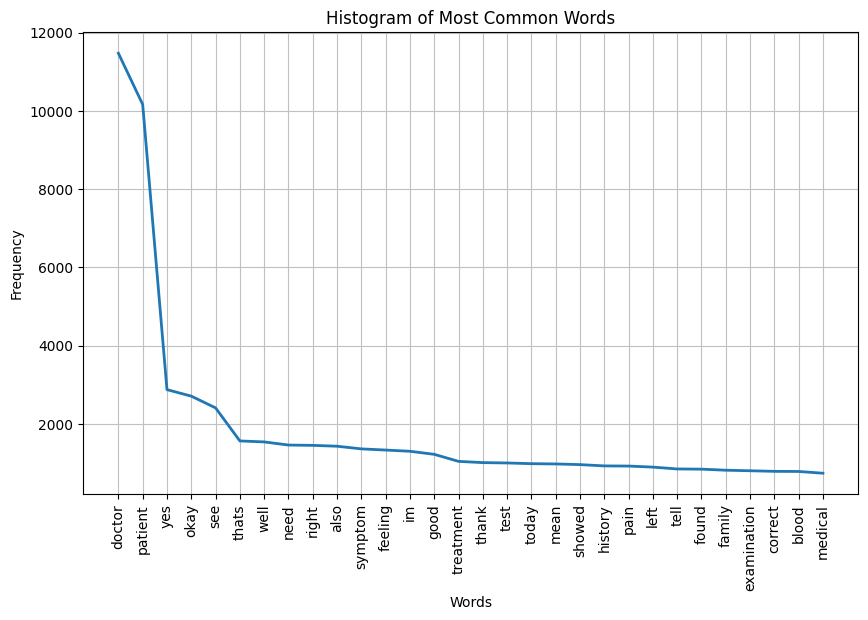

In [ ]:

from nltk.probability import FreqDist

# Combine all tokens into a single list
all_tokens = [word for tokens in sample_df['lemmatized_tokens'] for word in tokens]

# Get frequency distribution of the words
fdist = FreqDist(all_tokens)

# Display the 30 most common words
print("Most common words:")
print(fdist.most_common(10))

plt.figure(figsize=(10,6))
fdist.plot(30, cumulative=False)
plt.title('Histogram of Most Common Words')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()


The graph shows how many words are in 1000 text samples, with most texts having about 200 words. It helps understand the range and common length of the texts.

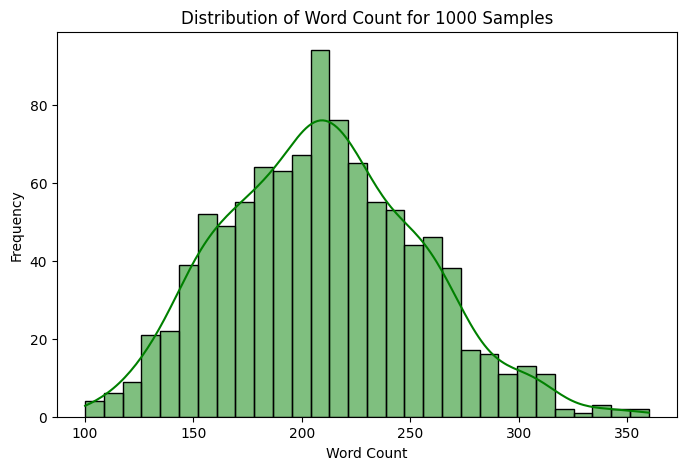

,lemmatized_tokens,word_count
1801,"[doctor, good, afternoon, feeling, today, pati...",148
1190,"[doctor, good, morning, help, today, patient, ...",208
1817,"[doctor, hello, mr, johnson, feeling, today, p...",201
251,"[doctor, good, afternoon, mr, x, see, medical,...",188
2505,"[doctor, hello, feeling, today, patient, im, a...",234


In [ ]:

#  Distributed Word Count Analysis (after tokenization)
sample_df['word_count'] = sample_df['lemmatized_tokens'].apply(len)

# Plot the distribution of word count
plt.figure(figsize=(8, 5))
sns.histplot(sample_df['word_count'], kde=True, color='green', bins=30)
plt.title("Distribution of Word Count for 1000 Samples")
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.show()

sample_df[['lemmatized_tokens', 'word_count']].head()

##7) Name Entity Recognition
 Named Entity Recognition (NER) using spaCy to a DataFrame by first joining lemmatized tokens into a single string and then extracting named entities from the joined text.

In [ ]:


# Load spaCy model for NER
nlp = spacy.load("en_core_web_sm")

# Function to apply NER
def perform_ner(text):
    doc = nlp(text)
    return [(ent.text, ent.label_) for ent in doc.ents]

# Join tokens into a single string before applying NER
sample_df['joined_tokens'] = sample_df['lemmatized_tokens'].apply(lambda tokens: " ".join(tokens))

# Apply NER to the joined text
sample_df['named_entities'] = sample_df['joined_tokens'].apply(perform_ner)

# Display the result
print("Lemmatized Tokens, Joined Tokens, and Named Entities:")
print(sample_df[['lemmatized_tokens', 'joined_tokens', 'named_entities']].head())


Lemmatized Tokens, Joined Tokens, and Named Entities:
                                      lemmatized_tokens  \
1801  [doctor, good, afternoon, feeling, today, pati...   
1190  [doctor, good, morning, help, today, patient, ...   
1817  [doctor, hello, mr, johnson, feeling, today, p...   
251   [doctor, good, afternoon, mr, x, see, medical,...   
2505  [doctor, hello, feeling, today, patient, im, a...   

                                          joined_tokens  \
1801  doctor good afternoon feeling today patient hm...   
1190  doctor good morning help today patient hi expe...   
1817  doctor hello mr johnson feeling today patient ...   
251   doctor good afternoon mr x see medical record ...   
2505  doctor hello feeling today patient im alright ...   

                                         named_entities  
1801  [(afternoon, TIME), (today, DATE), (two day la...  
1190  [(morning, TIME), (today, DATE), (past month, ...  
1817  [(johnson, PERSON), (today, DATE), (hospitaliz...  
251 

## 8)BOW -Bag of Words


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Convert list of tokens to text strings for vectorization
sample_df['text'] = sample_df['lemmatized_tokens'].apply(lambda x: ' '.join(x))

# Initialize CountVectorizer with stop words removal
vectorizer = CountVectorizer(stop_words='english')
X_bow = vectorizer.fit_transform(sample_df['text'])
bow_df = pd.DataFrame(X_bow.toarray(), columns=vectorizer.get_feature_names_out())

print("BoW after Stopword Removal:")
print(bow_df.head())


BoW after Stopword Removal:
   aa  aaa  aat  aatd  ab  abacavir  abag  abandoned  abatacept  abate  ...  \
0   0    0    0     0   0         0     0          0          0      0  ...   
1   0    0    0     0   0         0     0          0          0      0  ...   
2   0    0    0     0   0         0     0          0          0      0  ...   
3   0    0    0     0   0         0     0          0          0      0  ...   
4   0    0    0     0   0         0     0          0          0      0  ...   

   μgdl  μgkg  μgkgday  μgl  μgml  μiuml  μl  μm  μmol  μmoll  
0     0     0        0    0     0      0   0   0     0      0  
1     0     0        0    0     0      0   0   0     0      0  
2     0     0        0    0     0      0   0   0     0      0  
3     0     0        0    0     0      0   0   0     0      0  
4     0     0        0    0     0      0   0   0     0      1  

[5 rows x 12752 columns]


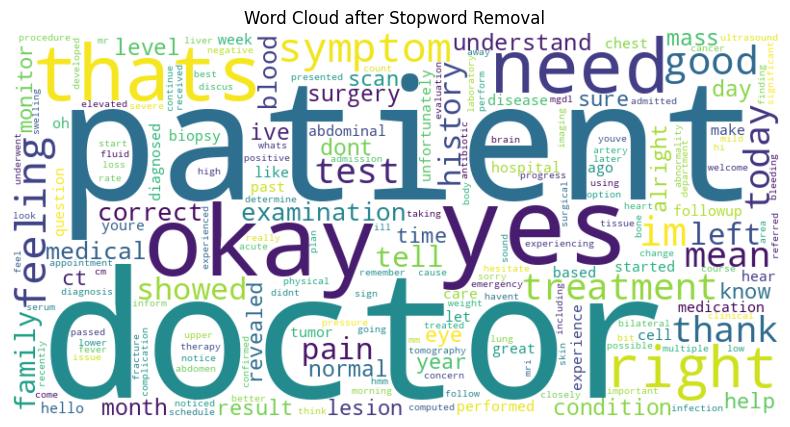

In [ ]:

from wordcloud import WordCloud
# Create the word cloud
word_freq = bow_df.sum(axis=0).to_dict()  # Sum the word frequencies
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud after Stopword Removal')
plt.show()

# Data Extraction / Feature Extraction

## Extracting gender

In [ ]:
def extract_gender(text):
    # Look for female-related keywords
    if re.search(r'\b(she|her|female|woman|girl|miss|mrs|primigravida)\b', text, re.IGNORECASE):
        return 'Female'
    # Look for male-related keywords
    elif re.search(r'\b(he|his|male|man|boy|mr)\b', text, re.IGNORECASE):
        return 'Male'
    return 'Unknown'
sample_df['gender'] = sample_df['data'].apply(extract_gender)
print(sample_df[['data', 'gender']].head())

                                                   data  gender
1801  The third case was a 64-year-old female who ad...  Female
1190  A 34-year-old woman presented with severe epis...  Female
1817  A 53-year-old man, who had non-exertional ches...    Male
251   A 34 year old woman from the east of Morocco, ...  Female
2505  A 19-year-old male of Caucasian origin was adm...    Male


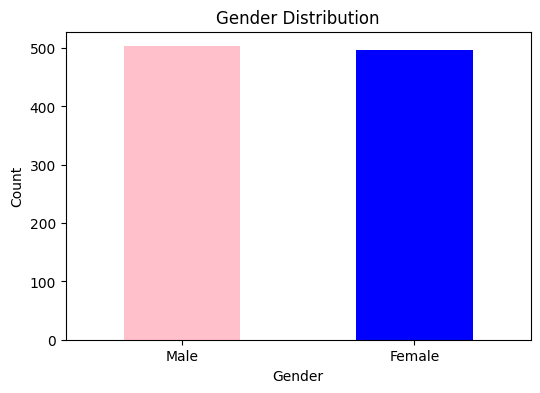

In [ ]:

gender_counts = sample_df['gender'].value_counts()
# Create a bar chart for gender distribution
plt.figure(figsize=(6, 4))
gender_counts.plot(kind='bar', color=['pink', 'blue', 'gray'])
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

## Extracted Age

In [ ]:

def extract_age(text):
    # Remove any special characters from the string
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)  # Corrected regex with a closing square bracket
    # Regular expression to find a digit right before the word "year"
    match = re.search(r'(\d+)\s*year', text, re.IGNORECASE)  # Added re.IGNORECASE for case insensitivity
    if match:
        return int(match.group(1))
    return None
sample_df['age'] = sample_df['data'].apply(extract_age)

print(sample_df[['data', 'age']].head())

                                                   data   age
1801  The third case was a 64-year-old female who ad...  64.0
1190  A 34-year-old woman presented with severe epis...  34.0
1817  A 53-year-old man, who had non-exertional ches...  53.0
251   A 34 year old woman from the east of Morocco, ...  34.0
2505  A 19-year-old male of Caucasian origin was adm...  19.0


<ipython-input-27-798d98b3c08c>:2: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




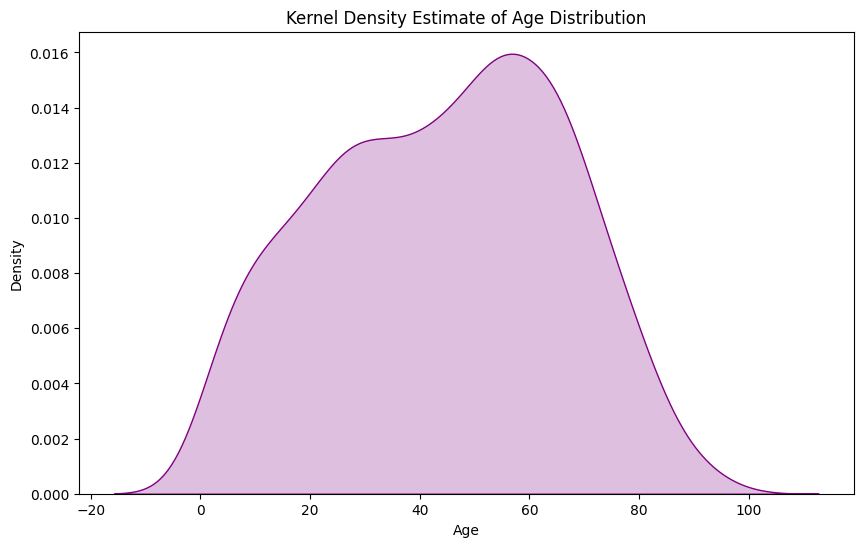

In [ ]:

plt.figure(figsize=(10, 6))
sns.kdeplot(sample_df['age'].dropna(), shade=True, color='purple')
plt.title('Kernel Density Estimate of Age Distribution')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()


Minimum Age: 1.0
Maximum Age: 96.0


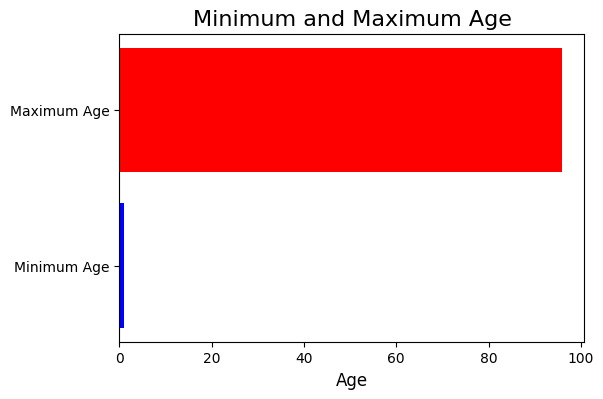

In [ ]:
# Calculate the minimum and maximum age
min_age = sample_df['age'].min()
max_age = sample_df['age'].max()
print(f"Minimum Age: {min_age}")
print(f"Maximum Age: {max_age}")
# Create a list with the labels and values for plotting
ages = [min_age, max_age]
labels = ['Minimum Age', 'Maximum Age']
# Create a bar plot to show the minimum and maximum age
plt.figure(figsize=(6, 4))
plt.barh(labels, ages, color=['blue', 'red'])
plt.title('Minimum and Maximum Age', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.show()


## Disease Extraction

Defines a list of common disease names that can be used for disease extraction from text data.




In [ ]:
from collections import Counter
import re

# Sample of common disease names for extraction (extendable)
common_diseases = [
    'COVID-19', 'diabetes', 'hypertension', 'cancer', 'tuberculosis',
    'asthma', 'stroke', 'malaria', 'influenza', 'hepatitis', 'arthritis',
    'pneumonia', 'HIV', 'Alzheimer', 'Parkinson', 'dengue', 'cholera',
    'epilepsy', 'leukemia', 'depression', 'anxiety', 'migraine', 'eczema',
    'osteoporosis', 'anemia', 'gout', 'obesity', 'cirrhosis', 'bronchitis',
    'lymphoma', 'psoriasis', 'meningitis', 'sinusitis', 'fibromyalgia',
    'sclerosis', 'ulcer', 'glaucoma', 'sepsis', 'schizophrenia', 'bipolar disorder',
    'autism', 'Down syndrome', 'lupus', 'sarcoidosis', 'tetanus', 'rabies',
    'measles', 'mumps', 'rubella', 'pertussis', 'diphtheria', 'polio',
    'smallpox', 'Ebola', 'Zika virus', 'yellow fever', 'encephalitis',
    'lyme disease', 'tinnitus', 'vertigo', 'vitiligo', 'scabies', 'ringworm',
    'conjunctivitis', 'keratitis', 'otitis', 'colitis', 'IBS', 'Celiac disease',
    'Crohn’s disease', 'diverticulitis', 'pancreatitis', 'renal failure',
    'urinary tract infection', 'prostatitis', 'endometriosis', 'fibroid',
    'cystitis', 'infertility', 'ovarian cyst', 'PCOS', 'impetigo',
    'cellulitis', 'gangrene', 'necrosis', 'alopecia', 'sickle cell anemia',
    'thalassemia', 'hemophilia', 'varicose veins', 'hemorrhoids',
    'carpal tunnel syndrome', 'tendinitis', 'plantar fasciitis',
    'herniated disc', 'sciatica', 'Bell’s palsy', 'Guillain-Barre syndrome',
    'myasthenia gravis', 'dystonia', 'sleep apnea'
]





 Extracts and counts the occurrences of diseases and ages from the text in the sample_df DataFrame, displaying the top 15 most common diseases and the extracted data for each entry.

In [ ]:
# Function to extract diseases from text using a predefined list
def extract_diseases(text, disease_list):
    found_diseases = []
    for disease in disease_list:
        if re.search(rf'\b{re.escape(disease)}\b', text, re.IGNORECASE):
            found_diseases.append(disease)
    return found_diseases

sample_df['extracted_diseases'] = sample_df['data'].apply(lambda x: extract_diseases(str(x), common_diseases))

all_diseases = [disease for diseases in sample_df['extracted_diseases'] for disease in diseases]
disease_counts = Counter(all_diseases)
top_15_diseases = disease_counts.most_common(15)
print("Top 15 Common Diseases:")
for disease, count in top_15_diseases:
    print(f"{disease}: {count} occurrences")


Top 15 Common Diseases:
hypertension: 128 occurrences
diabetes: 98 occurrences
cancer: 95 occurrences
hepatitis: 43 occurrences
anemia: 41 occurrences
necrosis: 38 occurrences
HIV: 33 occurrences
pneumonia: 31 occurrences
tuberculosis: 25 occurrences
lymphoma: 23 occurrences
anxiety: 19 occurrences
depression: 19 occurrences
obesity: 18 occurrences
ulcer: 16 occurrences
asthma: 16 occurrences


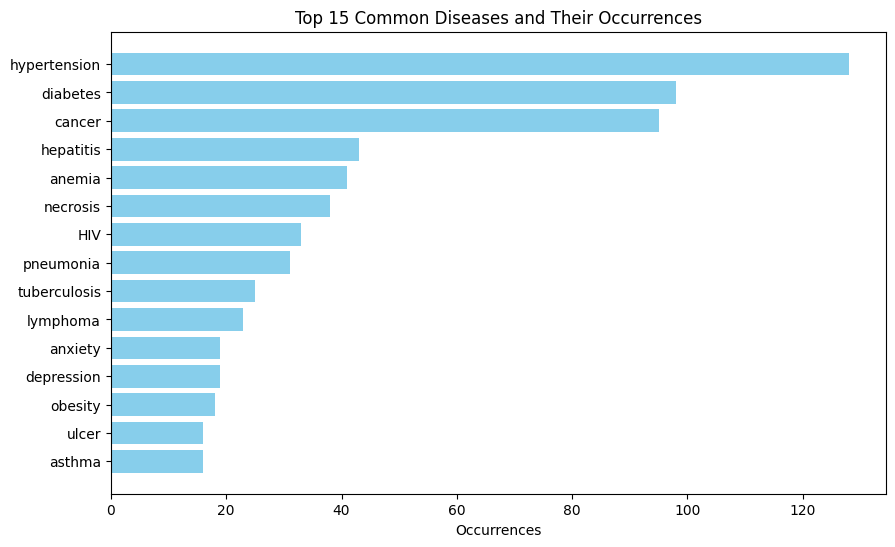

In [ ]:
# Histogram to show disease occurrences
disease_names = [disease for disease, _ in top_15_diseases]
disease_frequencies = [count for _, count in top_15_diseases]


plt.figure(figsize=(10, 6))
plt.barh(disease_names, disease_frequencies, color='skyblue')
plt.xlabel('Occurrences')
plt.title('Top 15 Common Diseases and Their Occurrences')
plt.gca().invert_yaxis()
plt.show()




 Heatmap showing the frequency of each disease in different age groups by grouping and counting occurrences in the extracted_diseases and extracted_ages columns.

<ipython-input-32-aab141ee4b56>:10: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



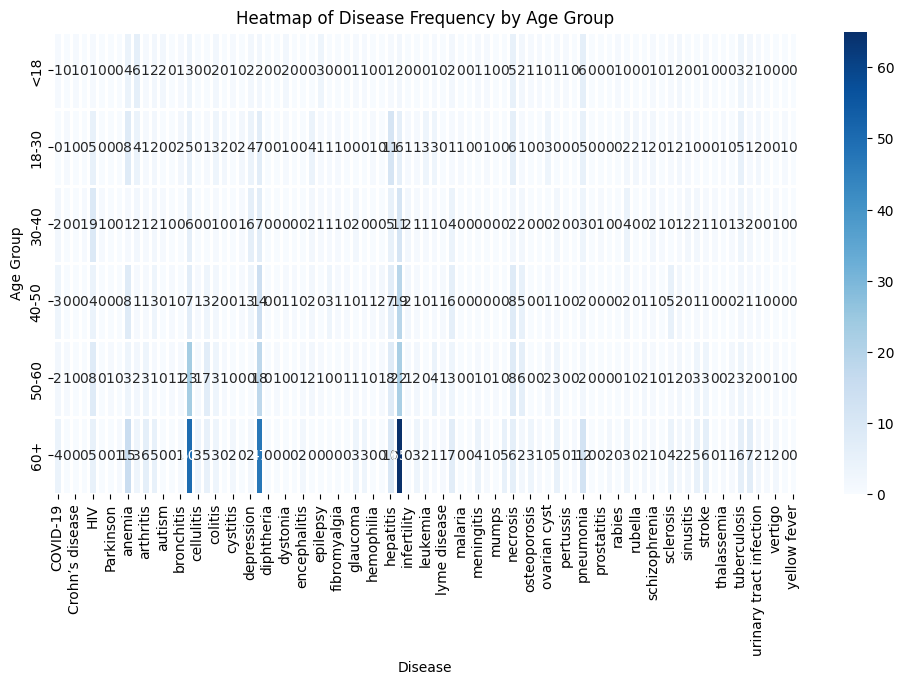

In [ ]:
# Exploding the 'extracted_diseases' to flatten the list of diseases
exploded_df = sample_df.explode('extracted_diseases')

# Created age groups
bins = [0, 18, 30, 40, 50, 60, 100]  # Adjust age bins as needed
labels = ['<18', '18-30', '30-40', '40-50', '50-60', '60+']
exploded_df['age_group'] = pd.cut(exploded_df['age'], bins=bins, labels=labels, right=False)

# Pivot table for heatmap (grouping by age group and disease)
heatmap_data = exploded_df.groupby(['age_group', 'extracted_diseases']).size().unstack(fill_value=0)

plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap='Blues', annot=True, fmt='d', linewidths=1.0)
plt.title('Heatmap of Disease Frequency by Age Group')
plt.xlabel('Disease')
plt.ylabel('Age Group')
plt.xticks(rotation=90)
plt.show()


Define the function to separate doctor and patient dialogues

In [ ]:

def separate_conversation(conversation):
    if isinstance(conversation, str):  # Ensure the conversation is a string
        doctor_dialogues = []
        patient_dialogues = []

        # Split conversation into lines
        lines = conversation.split("\n")

        for line in lines:
            if line.startswith("Doctor:"):
                doctor_dialogues.append(line[len("Doctor:"):].strip())  # Extract doctor's dialogue
            elif line.startswith("Patient:"):
                patient_dialogues.append(line[len("Patient:"):].strip())  # Extract patient's dialogue

        return " ".join(doctor_dialogues), " ".join(patient_dialogues)
    else:
        return "", ""

sample_df[['doctor_conversation', 'patient_conversation']] = sample_df['conversation'].apply(
    lambda x: pd.Series(separate_conversation(x))
)
sample_df.head()


,data,conversation,processed_conversation,processed_data,tokens,tokens_no_stopwords,pos_tags,lemmatized_tokens,word_count,joined_tokens,named_entities,text,gender,age,extracted_diseases,doctor_conversation,patient_conversation
1801,The third case was a 64-year-old female who ad...,"Doctor: Good afternoon, how are you feeling to...",doctor good afternoon how are you feeling toda...,the third case was a yearold female who admitt...,"[doctor, good, afternoon, how, are, you, feeli...","[doctor, good, afternoon, feeling, today, pati...","[(doctor, n), (good, a), (afternoon, n), (feel...","[doctor, good, afternoon, feeling, today, pati...",148,doctor good afternoon feeling today patient hm...,"[(afternoon, TIME), (today, DATE), (two day la...",doctor good afternoon feeling today patient hm...,Female,64.0,[],"Good afternoon, how are you feeling today? Oka...","Hmm, not great actually. I'm having some chest..."
1190,A 34-year-old woman presented with severe epis...,"Doctor: Good morning, how can I help you today...",doctor good morning how can i help you today p...,a yearold woman presented with severe episodic...,"[doctor, good, morning, how, can, i, help, you...","[doctor, good, morning, help, today, patient, ...","[(doctor, n), (good, a), (morning, n), (help, ...","[doctor, good, morning, help, today, patient, ...",208,doctor good morning help today patient hi expe...,"[(morning, TIME), (today, DATE), (past month, ...",doctor good morning help today patient hi expe...,Female,34.0,[hypertension],"Good morning, how can I help you today? When d...","Hi, I have been experiencing severe headaches ..."
1817,"A 53-year-old man, who had non-exertional ches...","Doctor: Hello, Mr. Johnson. How are you feelin...",doctor hello mr johnson how are you feeling to...,a yearold man who had nonexertional chest pain...,"[doctor, hello, mr, johnson, how, are, you, fe...","[doctor, hello, mr, johnson, feeling, today, p...","[(doctor, n), (hello, n), (mr, n), (johnson, n...","[doctor, hello, mr, johnson, feeling, today, p...",201,doctor hello mr johnson feeling today patient ...,"[(johnson, PERSON), (today, DATE), (hospitaliz...",doctor hello mr johnson feeling today patient ...,Male,53.0,[],"Hello, Mr. Johnson. How are you feeling today?...","I'm feeling okay, doctor. Yes, that's right. N..."
251,"A 34 year old woman from the east of Morocco, ...","Doctor: Good afternoon, Mrs. X. I see here in ...",doctor good afternoon mrs x i see here in your...,a year old woman from the east of morocco marr...,"[doctor, good, afternoon, mrs, x, i, see, here...","[doctor, good, afternoon, mrs, x, see, medical...","[(doctor, n), (good, a), (afternoon, n), (mrs,...","[doctor, good, afternoon, mr, x, see, medical,...",188,doctor good afternoon mr x see medical record ...,"[(afternoon, TIME), (hernia, GPE), (anesthesia...",doctor good afternoon mr x see medical record ...,Female,34.0,[],"Good afternoon, Mrs. X. I see here in your med...","Yes, doctor. That's right. Okay. Oh no. What d..."
2505,A 19-year-old male of Caucasian origin was adm...,"Doctor: Hello, how are you feeling today?\nPat...",doctor hello how are you feeling today patient...,a yearold male of caucasian origin was admitte...,"[doctor, hello, how, are, you, feeling, today,...","[doctor, hello, feeling, today, patient, im, a...","[(doctor, n), (hello, n), (feeling, v), (today...","[doctor, hello, feeling, today, patient, im, a...",234,doctor hello feeling today patient im alright ...,"[(today, DATE), (ten, CARDINAL), (four, CARDIN...",doctor hello feeling today patient im alright ...,Male,19.0,[],"Hello, how are you feeling today? I see here t...","I'm doing alright, thank you. Yeah, I was in a..."


In [ ]:
pip install vaderSentiment


## Sentimental Analysis

In [ ]:
# Import additional libraries
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer


## Patient Sentiment analysis

In [ ]:
# Initialize VADER sentiment analyzer
vader = SentimentIntensityAnalyzer()

def analyze_sentiment(text):
    """
    Perform comprehensive sentiment analysis using VADER
    """
    if isinstance(text, str):
        # Get VADER scores
        vader_scores = vader.polarity_scores(text)

        # Classify sentiment
        compound_score = vader_scores['compound']
        if compound_score >= 0.01:
            sentiment = 'Positive'
        elif compound_score <= -0.01:
            sentiment = 'Negative'
        else:
            sentiment = 'Neutral'

        return {
            'compound': compound_score,
            'pos': vader_scores['pos'],
            'neg': vader_scores['neg'],
            'neu': vader_scores['neu'],
            'sentiment': sentiment
        }
    return None

# Apply sentiment analysis to patient conversations
sample_df['sentiment_analysis'] = sample_df['patient_conversation'].apply(analyze_sentiment)



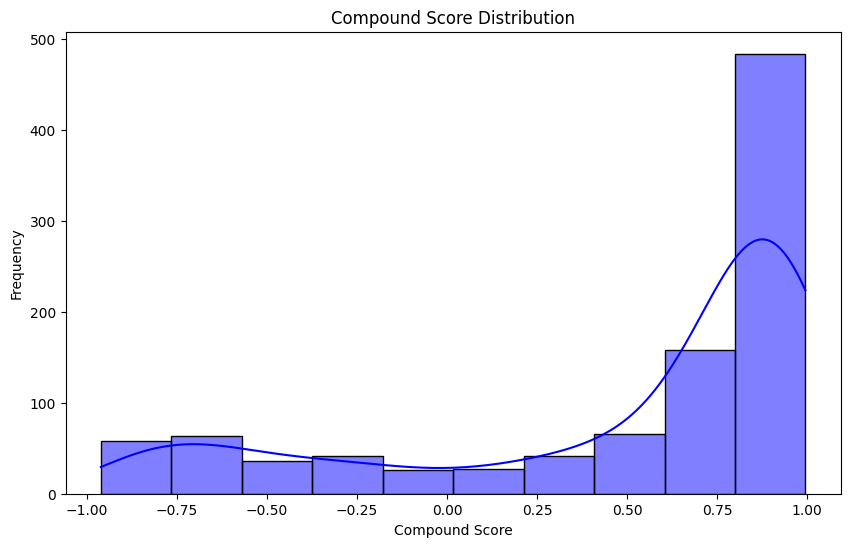

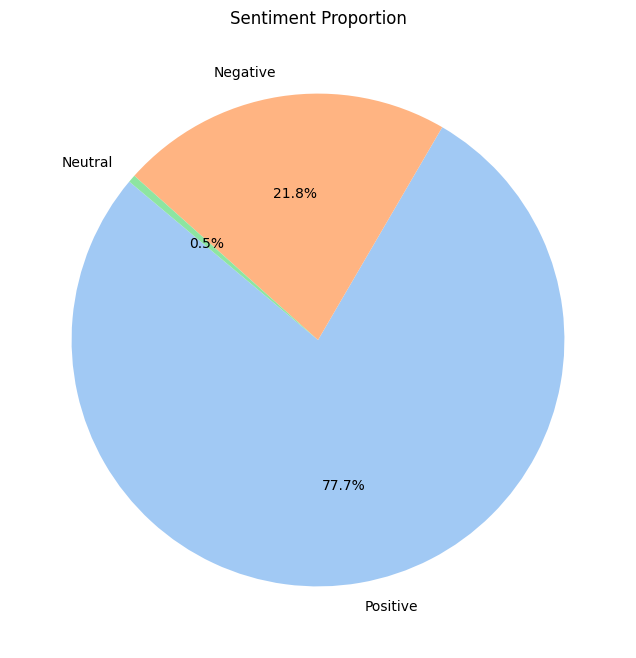

In [ ]:
# Extract sentiment data into new columns
sample_df['compound'] = sample_df['sentiment_analysis'].apply(lambda x: x['compound'])
sample_df['positive'] = sample_df['sentiment_analysis'].apply(lambda x: x['pos'])
sample_df['negative'] = sample_df['sentiment_analysis'].apply(lambda x: x['neg'])
sample_df['neutral'] = sample_df['sentiment_analysis'].apply(lambda x: x['neu'])
sample_df['sentiment'] = sample_df['sentiment_analysis'].apply(lambda x: x['sentiment'])


# Compound Score Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=sample_df, x='compound', kde=True, bins=10, color='blue')
plt.title('Compound Score Distribution')
plt.xlabel('Compound Score')
plt.ylabel('Frequency')
plt.show()

# Sentiment Proportion
sentiment_counts = sample_df['sentiment'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Sentiment Proportion')
plt.show()

##  Disease Severity Analysis

In [ ]:

def assess_severity(text):
    """
    Assess disease severity based on keywords and context
    """
    severity_keywords = {
        'severe': 3,
        'icu': 3,
        'critical': 3,
        'serious': 3,
        'moderate': 2,
        'mild': 1,
        'minor': 1
    }

    if isinstance(text, str):
        text_lower = text.lower()
        max_severity = 0

        # Check for severity keywords
        for keyword, score in severity_keywords.items():
            if keyword in text_lower:
                max_severity = max(max_severity, score)

        # Adjust severity based on sentiment
        sentiment = analyze_sentiment(text)
        if sentiment and sentiment['compound'] < -0.5:
            max_severity = max(max_severity, 2)

        return max_severity
    return 0

# Apply severity assessment
sample_df['severity_score'] = sample_df['data'].apply(assess_severity)



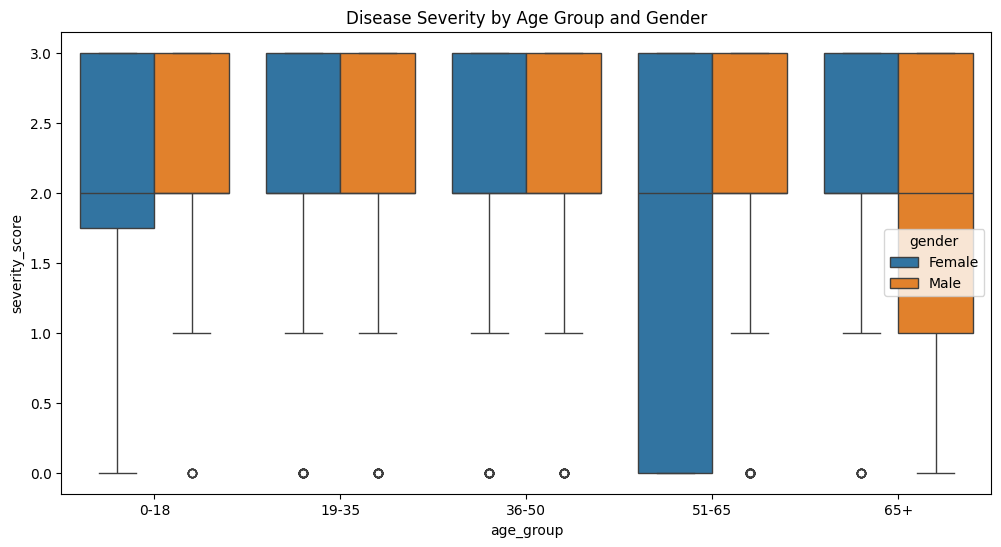

In [ ]:

sample_df['age_group'] = pd.cut(sample_df['age'],
                               bins=[0, 18, 35, 50, 65, 100],
                               labels=['0-18', '19-35', '36-50', '51-65', '65+'])

plt.figure(figsize=(12, 6))
sns.boxplot(data=sample_df, x='age_group', y='severity_score', hue='gender')
plt.title('Disease Severity by Age Group and Gender')
plt.show()



# Comprehensive visualizations



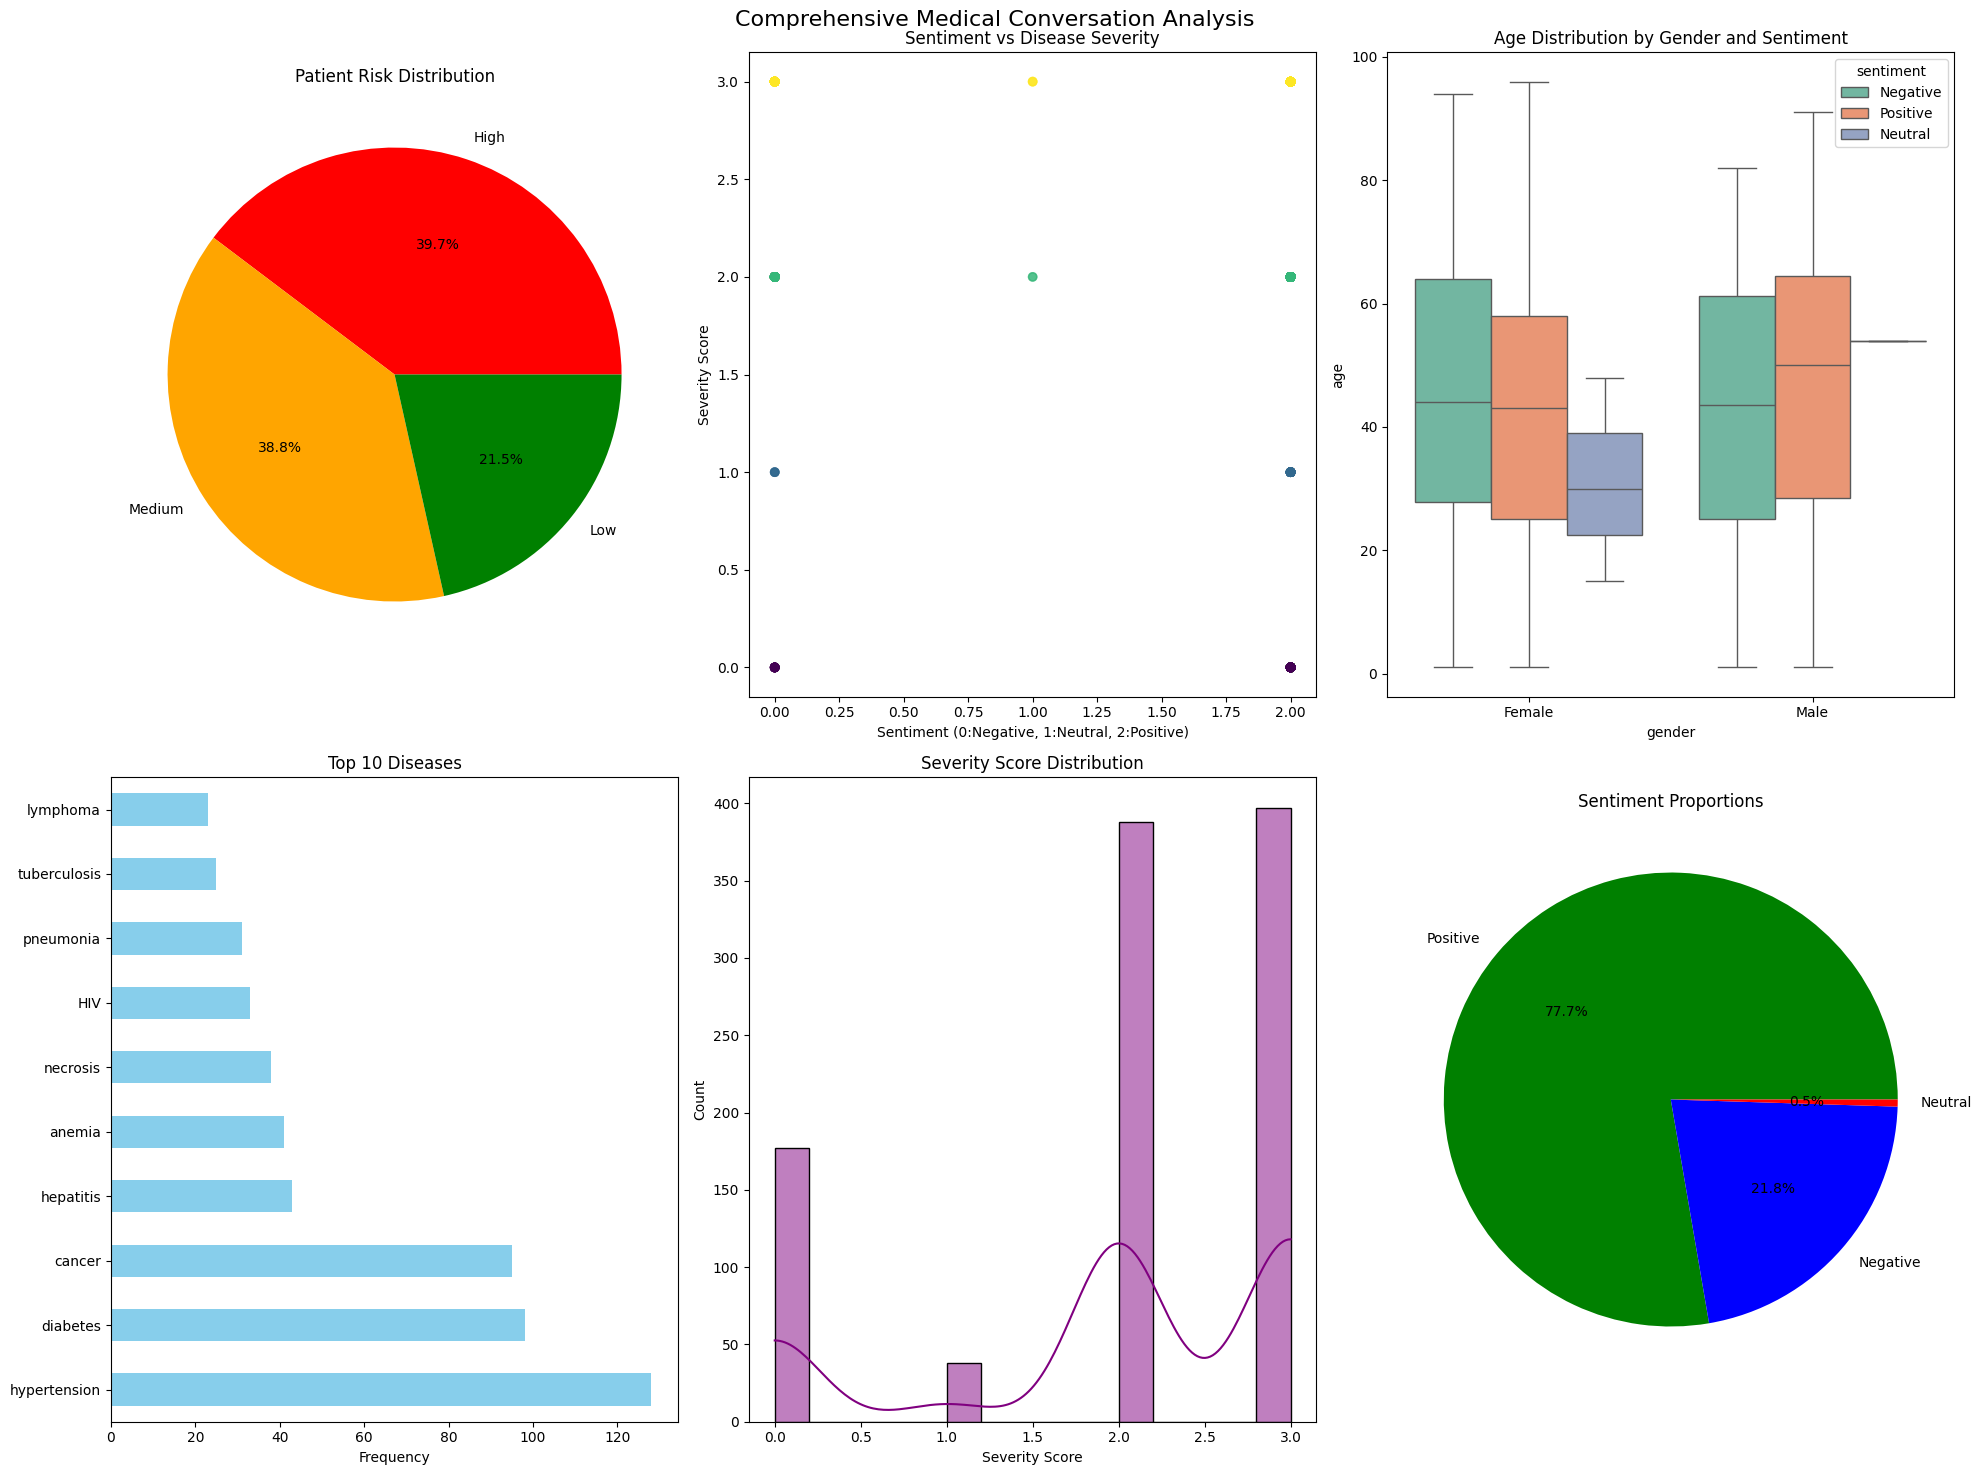

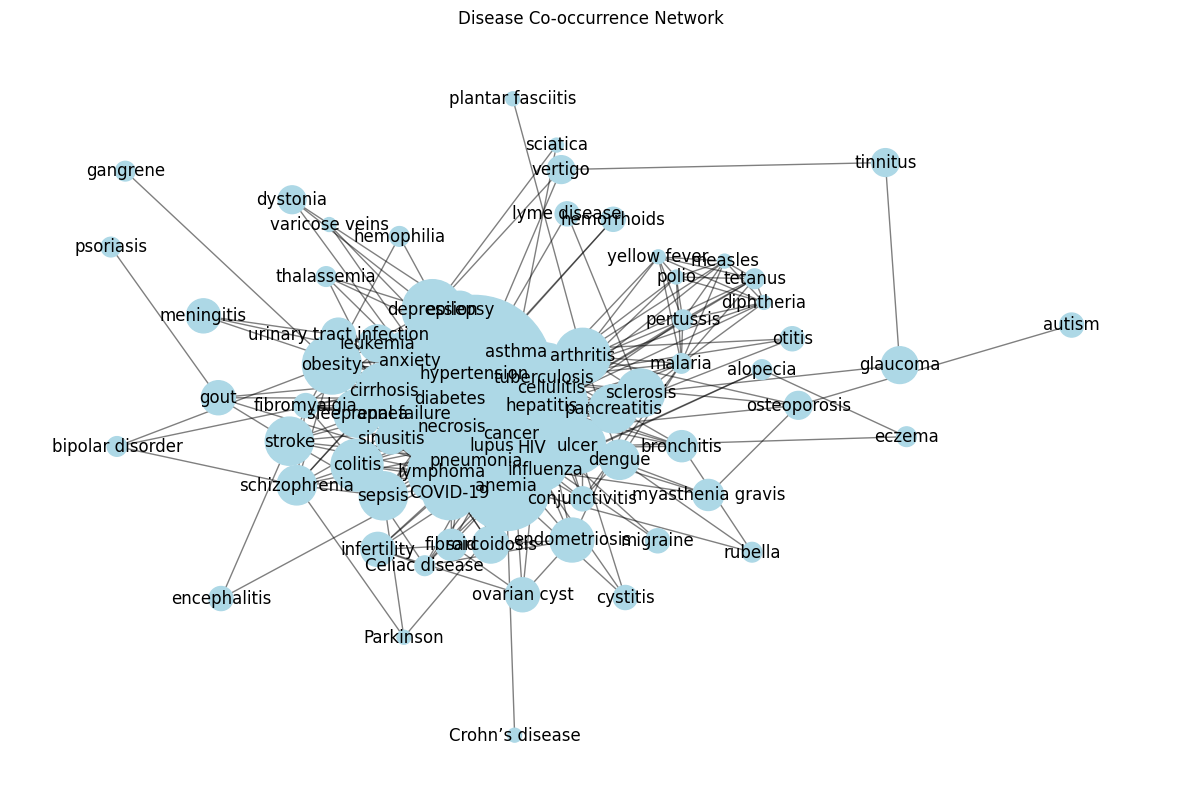

In [ ]:

def create_comprehensive_visualizations(sample_df):
    """
    Generate multiple visualizations for medical conversation analysis
    """
    plt.figure(figsize=(20, 15))
    plt.subplots_adjust(hspace=0.4, wspace=0.3)

    # 1. Risk Level Distribution Pie Chart
    plt.subplot(2, 3, 1)
    risk_levels = ['High', 'Medium', 'Low']
    risk_counts = [
        sum(sample_df['severity_score'] >= 3),
        sum((sample_df['severity_score'] == 2)),
        sum(sample_df['severity_score'] < 2)
    ]
    plt.pie(risk_counts, labels=risk_levels, autopct='%1.1f%%',
            colors=['red', 'orange', 'green'])
    plt.title('Patient Risk Distribution')

    # 2. Sentiment vs Severity Scatter Plot
    plt.subplot(2, 3, 2)
    sentiment_map = {'Positive': 2, 'Neutral': 1, 'Negative': 0}
    sample_df['sentiment_score'] = sample_df['sentiment'].map(sentiment_map)
    plt.scatter(sample_df['sentiment_score'], sample_df['severity_score'],
                alpha=0.6, c=sample_df['severity_score'], cmap='viridis')
    plt.title('Sentiment vs Disease Severity')
    plt.xlabel('Sentiment (0:Negative, 1:Neutral, 2:Positive)')
    plt.ylabel('Severity Score')

    # 3. Age Distribution Boxplot by Gender and Severity
    plt.subplot(2, 3, 3)
    sns.boxplot(x='gender', y='age', hue='sentiment',
                data=sample_df, palette='Set2')
    plt.title('Age Distribution by Gender and Sentiment')

    # 4. Top Diseases Horizontal Bar Chart
    plt.subplot(2, 3, 4)
    all_diseases = [disease for diseases in sample_df['extracted_diseases'] for disease in diseases]
    disease_counts = pd.Series(all_diseases).value_counts().head(10)
    disease_counts.plot(kind='barh', color='skyblue')
    plt.title('Top 10 Diseases')
    plt.xlabel('Frequency')

    # 5. Severity Score Distribution
    plt.subplot(2, 3, 5)
    sns.histplot(sample_df['severity_score'], kde=True, color='purple')
    plt.title('Severity Score Distribution')
    plt.xlabel('Severity Score')

    # 6. Sentiment Proportions
    plt.subplot(2, 3, 6)
    sentiment_counts = sample_df['sentiment'].value_counts()
    plt.pie(sentiment_counts, labels=sentiment_counts.index,
            autopct='%1.1f%%', colors=['green', 'blue', 'red'])
    plt.title('Sentiment Proportions')

    plt.suptitle('Comprehensive Medical Conversation Analysis', fontsize=16)
    plt.tight_layout()
    plt.show()

# Usage
create_comprehensive_visualizations(sample_df)

def advanced_disease_network(sample_df):
    """
    Create a network visualization of disease co-occurrences
    """
    import networkx as nx

    # Flatten disease lists
    all_diseases = [disease for diseases in sample_df['extracted_diseases'] for disease in diseases]
    disease_counts = pd.Series(all_diseases).value_counts()

    # Create graph
    G = nx.Graph()
    for diseases in sample_df['extracted_diseases']:
        for i in range(len(diseases)):
            for j in range(i+1, len(diseases)):
                G.add_edge(diseases[i], diseases[j])

    plt.figure(figsize=(15, 10))
    pos = nx.spring_layout(G, k=0.5)
    nx.draw_networkx_nodes(G, pos,
        node_color='lightblue',
        node_size=[disease_counts.get(node, 1)*100 for node in G.nodes()]
    )
    nx.draw_networkx_edges(G, pos, alpha=0.5)
    nx.draw_networkx_labels(G, pos)
    plt.title('Disease Co-occurrence Network')
    plt.axis('off')
    plt.show()

advanced_disease_network(sample_df)